In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, precision_recall_curve

import tensorflow as tf
from tensorflow.keras.utils import plot_model

import keras 
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, InputLayer, Flatten, Conv3D, MaxPooling3D

np.random.seed(42)
tf.random.set_seed(42)

from preprocessing.getdata import *

In [2]:
tf.config.list_physical_devices()
#tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [2]:
df = get_csvdata()
data = get_3D_data(df['ID'])

In [3]:
data = data.astype(np.float16)
data = data/data.max()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, df['CDR'], stratify = df['CDR'], random_state=42)

In [5]:
del data

In [6]:
HEIGHT = X_train.shape[1]
WIDTH = X_train.shape[2]
DEPTH = X_train.shape[3]

In [7]:
model = Sequential()

# layers
model.add(InputLayer(input_shape=[HEIGHT, WIDTH, DEPTH, 1], name='image'))
model.add(Conv3D(8, 3, activation="relu", padding="same"))
model.add(Conv3D(8, 3, activation="relu", padding="same"))
model.add(MaxPooling3D(pool_size=2, strides=2))
#model.add(Dropout(0.2))
#kernel_regularizer=keras.regularizers.l2(l=0.01)
model.add(Conv3D(16, 3, activation="relu", padding="same"))
model.add(Conv3D(16, 3, activation="relu", padding="same"))
model.add(MaxPooling3D(pool_size=2, strides=2))
model.add(Conv3D(16, 3, activation="relu", padding="same"))
model.add(Conv3D(16, 3, activation="relu", padding="same"))
model.add(MaxPooling3D(pool_size=2, strides=2))
#model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(units=16, activation="relu", kernel_regularizer='l2'))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam')
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy']) #[keras.metrics.Precision(), keras.metrics.Recall()])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 176, 208, 176, 8)  224       
                                                                 
 conv3d_1 (Conv3D)           (None, 176, 208, 176, 8)  1736      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 88, 104, 88, 8)   0         
 )                                                               
                                                                 
 conv3d_2 (Conv3D)           (None, 88, 104, 88, 16)   3472      
                                                                 
 conv3d_3 (Conv3D)           (None, 88, 104, 88, 16)   6928      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 44, 52, 44, 16)   0         
 3D)                                                    

In [8]:
training = model.fit(X_train, y_train, batch_size = 4, validation_split=0.0, epochs = 20)
        #callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1.0*10**(-epoch/30))])

Epoch 1/20
 5/34 [===>..........................] - ETA: 25:15 - loss: 0.8290 - accuracy: 0.3500

In [ ]:
y_predd = model.predict(X_test)
y_pred = (y_predd>0.5).astype(int)

Text(91.68, 0.5, 'predicted label')

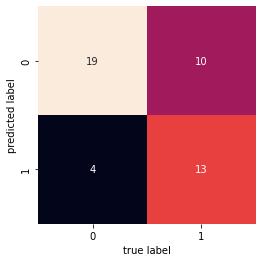

In [ ]:
accuracy_score(y_test, y_pred1)
mat = confusion_matrix(y_test, y_pred1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

KeyError: 'val_accuracy'

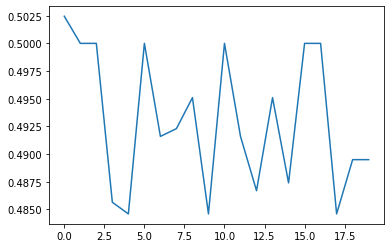

In [ ]:
# summarize history for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim([0.5,1.1])
plt.show()

2022-08-21 21:11:41.019624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


accuracy:  0.67
recall:  0.57
precision:  0.72


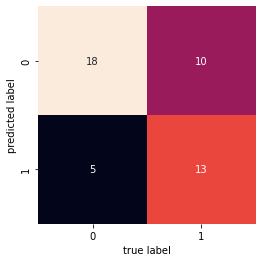

In [ ]:
y_predd = model.predict(X_test)
y_pred = (y_predd>0.5).astype(int)

# Plotting the confusing matrix
mat = confusion_matrix(y_test, y_pred.round())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
print('accuracy: ' , accuracy_score(y_test, y_pred.round()).round(2))
print('recall: ' , recall_score(y_test, y_pred.round()).round(2))
print('precision: ' , precision_score(y_test, y_pred.round()).round(2))

(0.0, 1.1)

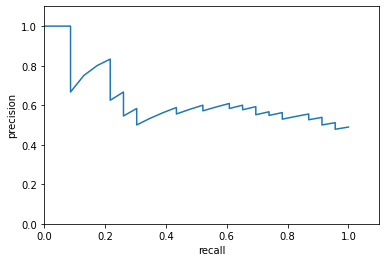

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_predd)

plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.xlim([0,1.1])
plt.ylim([0,1.1])